# Make the Decile

In [5]:
import pandas as pd
import numpy as np
from gprofiler import GProfiler


data = pd.read_csv('test_clean.csv')# chage data as need be

data["Decile_rank"] = pd.qcut(data["Probability_Class_1"], 10, labels=False)
data["Decile_rank"] = data["Decile_rank"].astype('category')
data["Decile_rank"] = data["Decile_rank"].cat.rename_categories([f'Q{i}' for i in range(10,0,-1)])

deciles = {}
for i in range(1, 11):
    deciles[f'q_{i}'] = data[data["Decile_rank"] == f'Q{i}'].copy()


# Gene enrich

In [6]:
def gprofiler(genes):
    gp = GProfiler(return_dataframe=True)
    gp_results = gp.profile(organism='hsapiens', query=genes,sources=['HP'],user_threshold=1)
    return gp_results

In [7]:
decile_list = deciles['q_1']["Ensembl_ID"].to_list()
test=gprofiler(decile_list)
test

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,HP,HP:0000729,Autistic behavior,1.134082e-57,True,Persistent deficits in social interaction and ...,582,641,219,4958,0.341654,0.376289,query_1,[HP:0000708]
1,HP,HP:0002463,Language impairment,9.827354e-43,True,Language impairment is a deficit in comprehens...,1130,641,297,4958,0.463339,0.262832,query_1,[HP:0034434]
2,HP,HP:0000750,Delayed speech and language development,7.435193e-42,True,A degree of language development that is signi...,1073,641,286,4958,0.446178,0.266542,query_1,"[HP:0002167, HP:0002463, HP:0012758]"
3,HP,HP:0000752,Hyperactivity,1.574228e-36,True,Hyperactivity is a condition characterized by ...,546,641,181,4958,0.282371,0.331502,query_1,[HP:0000734]
4,HP,HP:5200241,Recurrent maladaptive behavior,2.874408e-36,True,A repeating behavior that is either immediatel...,1081,641,277,4958,0.432137,0.256244,query_1,[HP:0000708]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6460,HP,HP:0004540,"Congenital, generalized hypertrichosis",1.000000e+00,False,"A confluent, generalized overgrowth of silvery...",3,641,1,4958,0.001560,0.333333,query_1,[HP:0000998]
6461,HP,HP:0004523,Long eyebrows,1.000000e+00,False,Increased length of the hairs of the eyebrows.,4,641,1,4958,0.001560,0.250000,query_1,[HP:0000534]
6462,HP,HP:0004502,Bilateral choanal atresia,1.000000e+00,False,Bilateral absence (atresia) of the posterior n...,9,641,3,4958,0.004680,0.333333,query_1,[HP:0000453]
6463,HP,HP:0004570,Increased vertebral height,1.000000e+00,False,Increased top to bottom height of vertebral bo...,8,641,1,4958,0.001560,0.125000,query_1,[HP:0003312]


# All results

In [8]:
def get_decile_results(deciles,hp_term="HP:0000717"):
    dataframes= []
    for i,key in enumerate(deciles):
        decile_list = deciles[key]["Ensembl_ID"].to_list()
        print(f'Processing {key}...')
        decile_results = gprofiler(decile_list)
        decile_results.insert(0, "Decile", i+1)
        decile_results=decile_results[decile_results['native']==hp_term]
        dataframes.append(decile_results)

    data = pd.concat(dataframes)
    data= data.sort_values(by='Decile', ascending=False).reset_index(drop=True)
    data['Intersection_to_Term_Ratio'] = data['intersection_size'] / data['term_size']
    data=data.sort_values(by='Decile', ascending=True).reset_index(drop=True)
    return data


In [9]:
autism_disease=get_decile_results(deciles,hp_term="HP:0000717"),"Autism disease"
df,name=autism_disease
df

Processing q_1...
Processing q_2...
Processing q_3...
Processing q_4...
Processing q_5...
Processing q_6...
Processing q_7...
Processing q_8...
Processing q_9...
Processing q_10...


,Decile,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,Intersection_to_Term_Ratio
0,1,HP,HP:0000717,Autism,2.646073e-13,True,Autism is a neurodevelopmental disorder charac...,255,641,82,4958,0.127925,0.321569,query_1,[HP:0000729],0.321569
1,2,HP,HP:0000717,Autism,1.000000e+00,False,Autism is a neurodevelopmental disorder charac...,255,560,36,4958,0.064286,0.141176,query_1,[HP:0000729],0.141176
2,3,HP,HP:0000717,Autism,1.000000e+00,False,Autism is a neurodevelopmental disorder charac...,255,504,23,4958,0.045635,0.090196,query_1,[HP:0000729],0.090196
3,4,HP,HP:0000717,Autism,1.000000e+00,False,Autism is a neurodevelopmental disorder charac...,255,530,25,4958,0.047170,0.098039,query_1,[HP:0000729],0.098039
4,5,HP,HP:0000717,Autism,1.000000e+00,False,Autism is a neurodevelopmental disorder charac...,255,493,15,4958,0.030426,0.058824,query_1,[HP:0000729],0.058824
5,6,HP,HP:0000717,Autism,1.000000e+00,False,Autism is a neurodevelopmental disorder charac...,255,462,9,4958,0.019481,0.035294,query_1,[HP:0000729],0.035294
6,7,HP,HP:0000717,Autism,1.000000e+00,False,Autism is a neurodevelopmental disorder charac...,255,416,14,4958,0.033654,0.054902,query_1,[HP:0000729],0.054902
7,8,HP,HP:0000717,Autism,1.000000e+00,False,Autism is a neurodevelopmental disorder charac...,255,422,13,4958,0.030806,0.050980,query_1,[HP:0000729],0.050980
8,9,HP,HP:0000717,Autism,1.000000e+00,False,Autism is a neurodevelopmental disorder charac...,255,354,16,4958,0.045198,0.062745,query_1,[HP:0000729],0.062745
9,10,HP,HP:0000717,Autism,1.000000e+00,False,Autism is a neurodevelopmental disorder charac...,255,290,4,4958,0.013793,0.015686,query_1,[HP:0000729],0.015686


In [10]:
autistic_behaviour=get_decile_results(deciles,hp_term="HP:0000729"),"Autistic behaviour"
intellectual_disability=get_decile_results(deciles,hp_term="HP:0001249"),"Intellectual disability"
generalised_seizure=get_decile_results(deciles,hp_term="HP:0002197"),"Generalized-onset seizure"
gastro_inf=get_decile_results(deciles,hp_term="HP:0004386"),"Gastrointestinal inflammation"
adhd=get_decile_results(deciles,hp_term="HP:0007018"),"ADHD"

Processing q_1...
Processing q_2...
Processing q_3...
Processing q_4...
Processing q_5...
Processing q_6...
Processing q_7...
Processing q_8...
Processing q_9...
Processing q_10...
Processing q_1...
Processing q_2...
Processing q_3...
Processing q_4...
Processing q_5...
Processing q_6...
Processing q_7...
Processing q_8...
Processing q_9...
Processing q_10...
Processing q_1...
Processing q_2...
Processing q_3...
Processing q_4...
Processing q_5...
Processing q_6...
Processing q_7...
Processing q_8...
Processing q_9...
Processing q_10...
Processing q_1...
Processing q_2...
Processing q_3...
Processing q_4...
Processing q_5...
Processing q_6...
Processing q_7...
Processing q_8...
Processing q_9...
Processing q_10...
Processing q_1...
Processing q_2...
Processing q_3...
Processing q_4...
Processing q_5...
Processing q_6...
Processing q_7...
Processing q_8...
Processing q_9...
Processing q_10...


In [13]:
df,name=autistic_behaviour
df

,Decile,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,Intersection_to_Term_Ratio
0,1,HP,HP:0000729,Autistic behavior,1.134082e-57,True,Persistent deficits in social interaction and ...,582,641,219,4958,0.341654,0.376289,query_1,[HP:0000708],0.376289
1,2,HP,HP:0000729,Autistic behavior,1.000000e+00,False,Persistent deficits in social interaction and ...,582,560,79,4958,0.141071,0.135739,query_1,[HP:0000708],0.135739
2,3,HP,HP:0000729,Autistic behavior,1.000000e+00,False,Persistent deficits in social interaction and ...,582,504,56,4958,0.111111,0.096220,query_1,[HP:0000708],0.096220
3,4,HP,HP:0000729,Autistic behavior,1.000000e+00,False,Persistent deficits in social interaction and ...,582,530,49,4958,0.092453,0.084192,query_1,[HP:0000708],0.084192
4,5,HP,HP:0000729,Autistic behavior,1.000000e+00,False,Persistent deficits in social interaction and ...,582,493,42,4958,0.085193,0.072165,query_1,[HP:0000708],0.072165
5,6,HP,HP:0000729,Autistic behavior,1.000000e+00,False,Persistent deficits in social interaction and ...,582,462,27,4958,0.058442,0.046392,query_1,[HP:0000708],0.046392
6,7,HP,HP:0000729,Autistic behavior,1.000000e+00,False,Persistent deficits in social interaction and ...,582,416,22,4958,0.052885,0.037801,query_1,[HP:0000708],0.037801
7,8,HP,HP:0000729,Autistic behavior,1.000000e+00,False,Persistent deficits in social interaction and ...,582,422,25,4958,0.059242,0.042955,query_1,[HP:0000708],0.042955
8,9,HP,HP:0000729,Autistic behavior,1.000000e+00,False,Persistent deficits in social interaction and ...,582,354,21,4958,0.059322,0.036082,query_1,[HP:0000708],0.036082
9,10,HP,HP:0000729,Autistic behavior,1.000000e+00,False,Persistent deficits in social interaction and ...,582,290,8,4958,0.027586,0.013746,query_1,[HP:0000708],0.013746


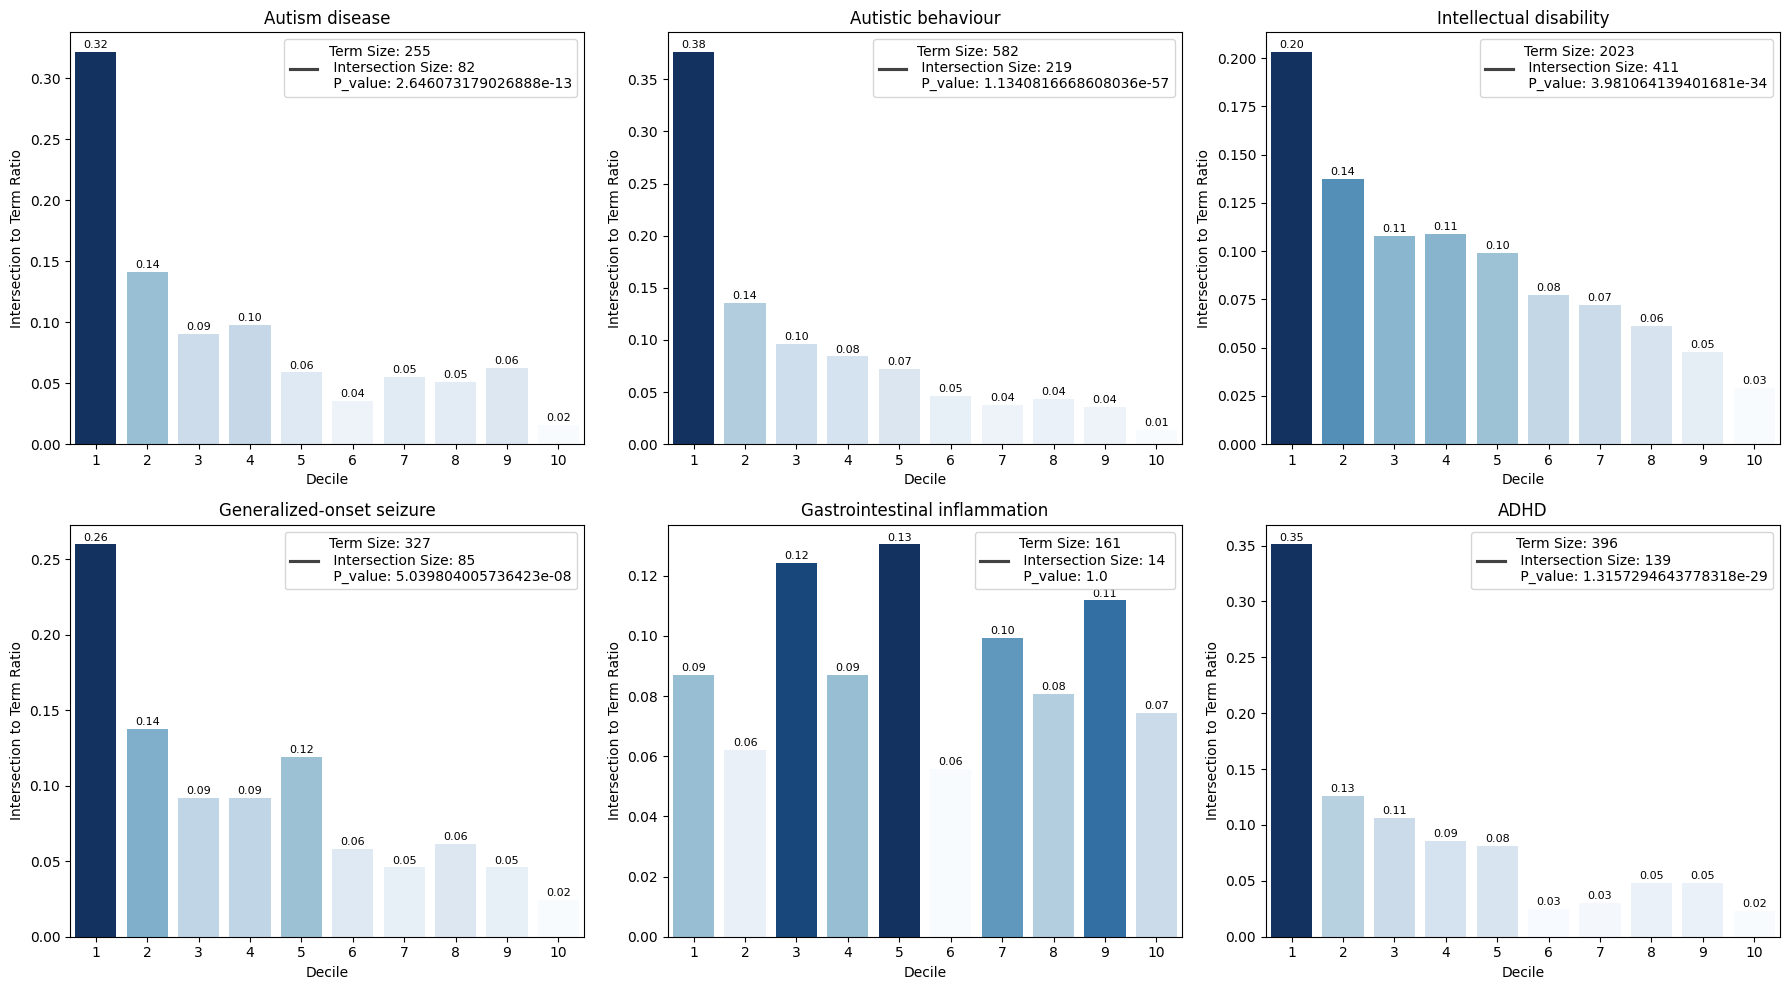

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_comparison_graphs(df1, df2, df3, df4, df5, df6):
    data1, name1 = df1
    data2, name2 = df2
    data3, name3 = df3
    data4, name4 = df4
    data5, name5 = df5
    data6, name6 = df6
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    color_palette = sns.color_palette("Blues", as_cmap=True)

    for ax, df, title in zip(axes.ravel(), [data1, data2, data3, data4, data5, data6], [name1, name2, name3, name4, name5, name6]):
        sns.barplot(x='Decile', y='Intersection_to_Term_Ratio', data=df, ax=ax, palette=color_palette, hue='Intersection_to_Term_Ratio', legend=False)
        ax.set_title(title)
        ax.set_xlabel('Decile')
        ax.set_ylabel('Intersection to Term Ratio')
        
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
        
        term_size = df['term_size'].iloc[0]
        intersection_size = df['intersection_size'].iloc[0]
        p_value = df['p_value'].iloc[0]
        
        ax.legend([f'Term Size: {term_size} \n Intersection Size: {intersection_size} \n P_value: {p_value}'], loc='upper right', fontsize='medium', fancybox=True)

    plt.tight_layout()
    plt.show()
    
plot_comparison_graphs(autism_disease, autistic_behaviour, intellectual_disability, generalised_seizure, gastro_inf, adhd)
